In [2]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
columns_names= ['Id','Entity','Sentiment','Content']
twitter_df = pd.read_csv('twitter_training.csv',names=columns_names)

In [4]:
twitter_df.head()

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
twitter_df.shape

(74682, 4)

In [7]:
twitter_df.isnull().sum()

Id             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [8]:
# dropping the rows with content missing values
twitter_df.dropna(subset=['Content'],inplace=True)

In [9]:
twitter_df.isnull().sum()

Id           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [10]:
twitter_df.duplicated().sum()

2340

In [11]:
# Drop duplicate rows
twitter_df.drop_duplicates(keep='first').reset_index(drop=True, inplace=True)

In [12]:
twitter_df.duplicated().sum()

2340

In [13]:
twitter_df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [14]:
# Update sentiment labels: Replace 'Irrelevant' sentiments with 'Neutral' to standardize sentiment categories.
twitter_df['Sentiment']=twitter_df['Sentiment'].replace('Irrelevant','Neutral')

In [15]:
twitter_df

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


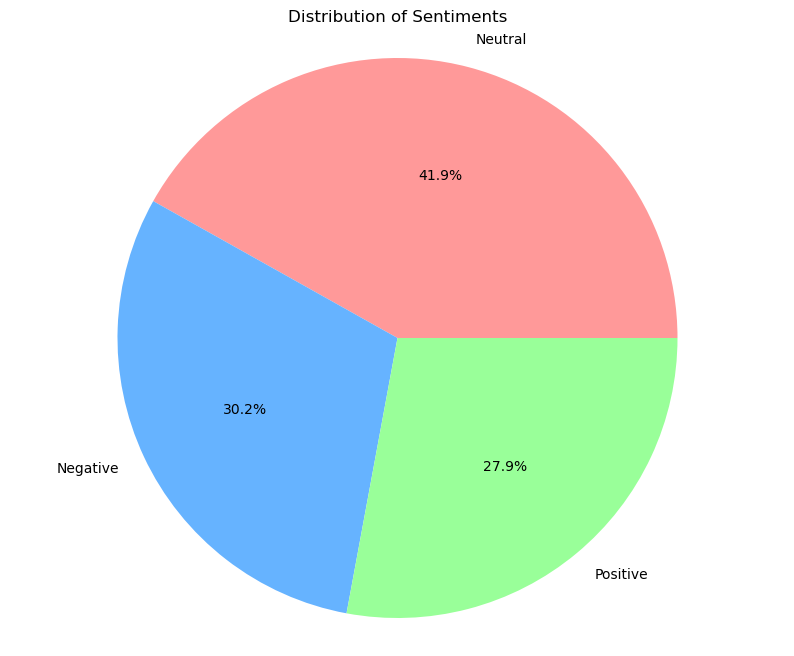

In [16]:
# Calculate the distribution of sentiments
sentiment_distribution = twitter_df['Sentiment'].value_counts()
# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(10, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%',colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()


# Sentiment Distribution Summary

* **Neutral Sentiment:** Approximately 42.2% of sentiments are neutral.
* **Negative Sentiment:** About 30.3% of sentiments are negative.
* **Positive Sentiment:** Around 27.5% of sentiments are positive

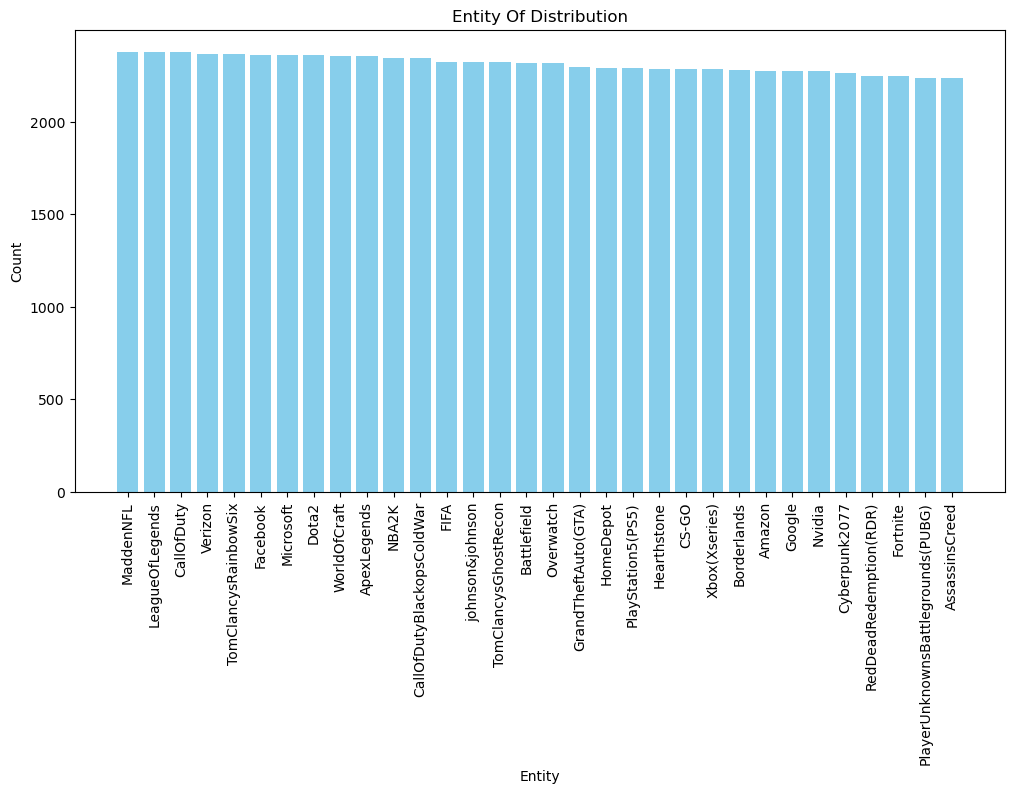

In [17]:
# Calculate The distribution Of Entity
entity_distribution = twitter_df['Entity'].value_counts()

# create a bar Chart
plt.figure(figsize=(12,6))
plt.bar(entity_distribution.index,entity_distribution.values,color='skyblue')
plt.title('Entity Of Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

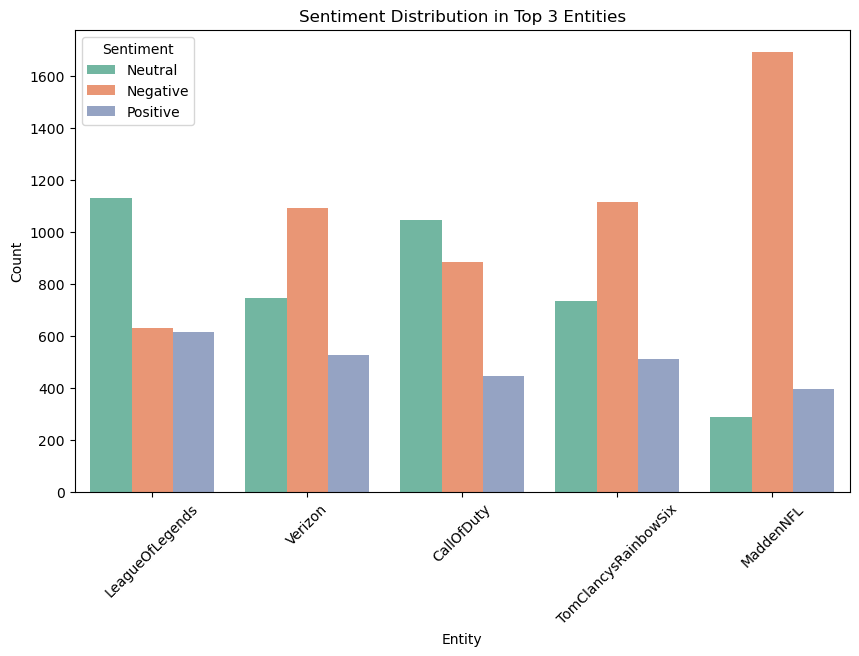

In [26]:
#Sentiment Distribution In Top 5 Entities
entity_distribution= twitter_df['Entity'].value_counts()


top_5_entities = entity_distribution.head(5).index

df_top_5 = twitter_df[twitter_df['Entity'].isin(top_5_entities)]


plt.figure(figsize=(10,6))
sns.countplot(data=df_top_5, x='Entity', hue='Sentiment',palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()


**Among The Top 5 Entities**
* MaddenNFL has the Highest Negative Sentiments.
* LeagueOfLegends has the Highest Neutral Sentiments.

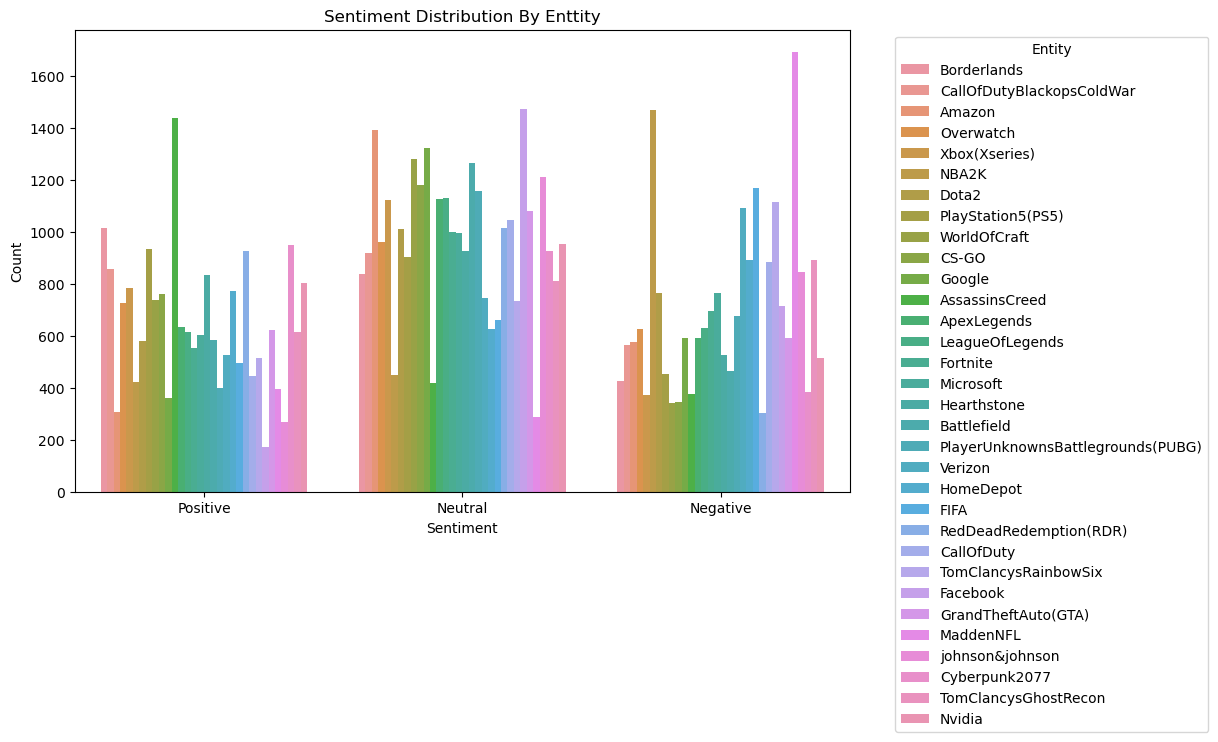

In [29]:
# Sentiments Distribution By Entity
plt.figure(figsize=(10,6))
sns.countplot(data=twitter_df,x='Sentiment', hue='Entity')
plt.title('Sentiment Distribution By Enttity')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Entity',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

* The Charts Provides A Visual Overview Of How Sentiment Are Distributed Amonig Different Entities
* It's Evident That Sentiment Distribution Varies By Entity,with Some Entities Having A More Positive Or Negative Sentiments Compared To Others.
* This Analysis Can Guide Targeted Engagement & Communication Strategies For Each Entity Based On Sentiments Trends.
* For Entities With a High Negative Sentiment,addressing issues & improving Customer Satisfaction may be a priority, while Entities With a positive Sentiments Can be a leveraged For Marketing & Brand Promotion.